# coding: utf-8

# # Automatic Ticket Assignment - Capstone Project By PREM VISHNOI
# 
# ## Problem Statement - 
# 
# In most of the IT organizations, the assignment of incidents to appropriate IT groups is still a manual process. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service. 
# 
# _<font color=blue>This capstone project intends to reduce the manual intervention of IT operations or Service desk teams by automating the ticket assignment process.The goal here is to create a text classification based ML model that can automatically  classify any new tickets by analysing ticket description to one of the relevant Assignment groups, which could be later integrated to any ITSM tool like Service Now. Based on the ticket description our model will output the probability of assigning it to one of the 74 Groups.</font>_
# 
# The solution would be implemented using below approach:
# - Approach 1 - Using a traditional machine learning algorithm we would be classifying the tickets into one of the groups having more than 100 tickets.
# - Approach 2 - Firstly the ticket would be classified into L1/L2 or L3 classes and then it would be further classified into one of the given assignment groups.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
# ### A quick look at our data and inspect

# #### Read the data using pandas read_excel

In [3]:
df = pd.read_excel("../dataset/input_data.xlsx", encoding='utf-8')


In [4]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [5]:
# #### Shape of the data


In [6]:
df.shape

(8500, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [8]:
# ### Observation:
# 
# - There are 4 columns and all are string columns
# - There are totally 8500 rows and there seems to be mising values in Short description and Description columns, which needs to be looked into and handled
# - Caller columns mainly contains the details of the user who raised the incident and is of not much use in our analysis and can be dropped.
# - Assignment group is our predictor / target column with multiple classes. 
# - This is a Multiclass Classification problem 
# ### Lets drop Caller column as its does not seems to contribute in predicting the target


In [9]:
df_incidents = df.drop('Caller', axis=1)
# ### Lets see the number of classes in the Assignment group


In [10]:
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [11]:
len(df_incidents['Assignment group'].unique())

74

In [12]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()

In [13]:
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

index  Assignment group  percentage
0   GRP_0              3976   46.776471
1   GRP_8               661    7.776471
2  GRP_24               289    3.400000
3  GRP_12               257    3.023529
4   GRP_9               252    2.964706

In [14]:
# ### Lets visualize the percentage of incidents per assignment group
# Plot to visualize the percentage data distribution across different groups


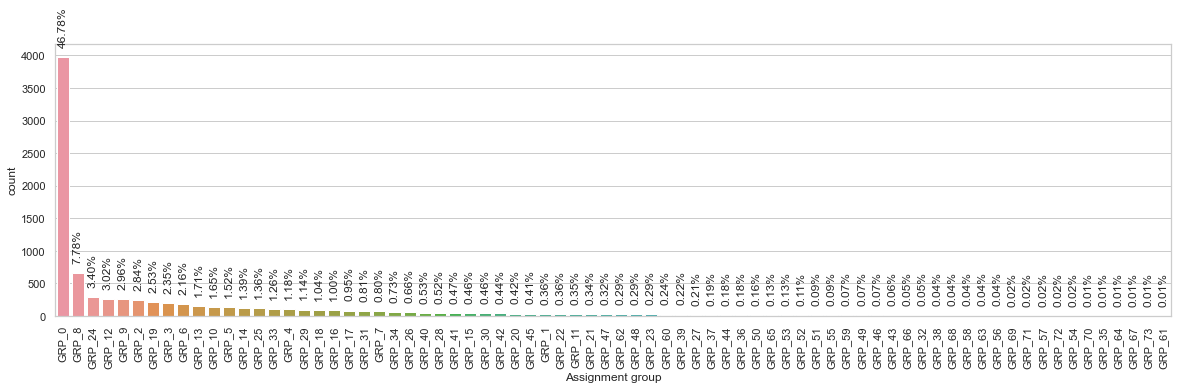

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')



In [29]:
# ### Observation
# - This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
# - There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2  incidents, need to see if we can drop those rows due to the lack of samples representing those classes. They might not be of much help as a predictor


In [30]:
df_incidents.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0  
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                       skype error             GRP_0

In [32]:
df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()

index  Assignment group
0    GRP_0              3976
1    GRP_8               661
2   GRP_24               289
3   GRP_12               257
4    GRP_9               252
5    GRP_2               241
6   GRP_19               215
7    GRP_3               200
8    GRP_6               184
9   GRP_13               145
10  GRP_10               140
11   GRP_5               129
12  GRP_14               118
13  GRP_25               116
14  GRP_33               107
15   GRP_4               100
16  GRP_29                97
17  GRP_18                88
18  GRP_16                85
19  GRP_17                81

In [33]:
df_top_20=df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()

Rectangle(xy=(-0.4, 0), width=0.8, height=3976, angle=0)
3976
Rectangle(xy=(0.6, 0), width=0.8, height=661, angle=0)
661
Rectangle(xy=(1.6, 0), width=0.8, height=289, angle=0)
289
Rectangle(xy=(2.6, 0), width=0.8, height=257, angle=0)
257
Rectangle(xy=(3.6, 0), width=0.8, height=252, angle=0)
252
Rectangle(xy=(4.6, 0), width=0.8, height=241, angle=0)
241
Rectangle(xy=(5.6, 0), width=0.8, height=215, angle=0)
215
Rectangle(xy=(6.6, 0), width=0.8, height=200, angle=0)
200
Rectangle(xy=(7.6, 0), width=0.8, height=184, angle=0)
184
Rectangle(xy=(8.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(9.6, 0), width=0.8, height=140, angle=0)
140
Rectangle(xy=(10.6, 0), width=0.8, height=129, angle=0)
129
Rectangle(xy=(11.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(12.6, 0), width=0.8, height=116, angle=0)
116
Rectangle(xy=(13.6, 0), width=0.8, height=107, angle=0)
107
Rectangle(xy=(14.6, 0), width=0.8, height=100, angle=0)
100
Rectangle(xy=(15.6, 0), width=0.8, height=97, an

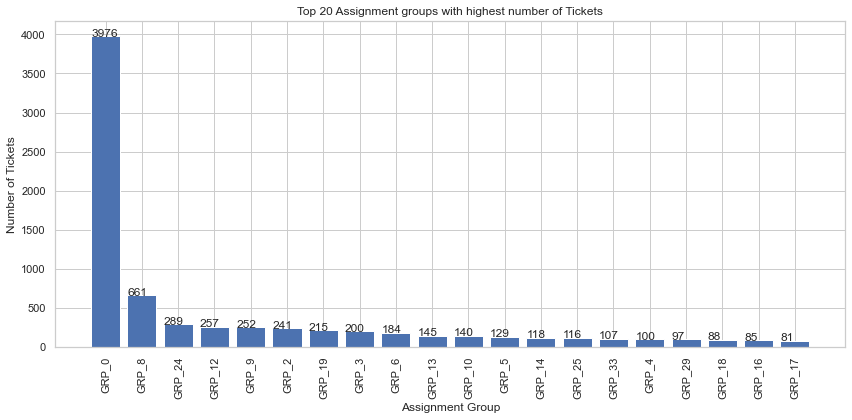

In [50]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel("Assignment Group")
plt.xticks(rotation=90)
plt.ylabel("Number of Tickets")

for bar in bars:
    print(bar)
    yval=bar.get_height()
    print(yval)
    plt.text(bar.get_x(), yval + .005 , yval)
    
plt.tight_layout()
plt.show()


In [51]:
# ### Lets view the bottom 20 Assignment groups with less number of tickets


In [56]:
df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()

index  Assignment group
0   GRP_70                 1
1   GRP_35                 1
2   GRP_64                 1
3   GRP_67                 1
4   GRP_73                 1
5   GRP_61                 1
6   GRP_69                 2
7   GRP_71                 2
8   GRP_57                 2
9   GRP_72                 2
10  GRP_54                 2
11  GRP_38                 3
12  GRP_68                 3
13  GRP_58                 3
14  GRP_63                 3
15  GRP_56                 3
16  GRP_66                 4
17  GRP_32                 4
18  GRP_43                 5
19  GRP_59                 6

In [57]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()

Rectangle(xy=(-0.4, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(0.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(1.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(2.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(3.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(4.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(5.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(6.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(7.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(8.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(9.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(10.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(11.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(12.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(13.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(14.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(15.6, 0), width=0.8, height=4, angle=0)
4
Rectangle(xy=(16.6, 0), width=0.8, height=4, angle=0)
4
Re

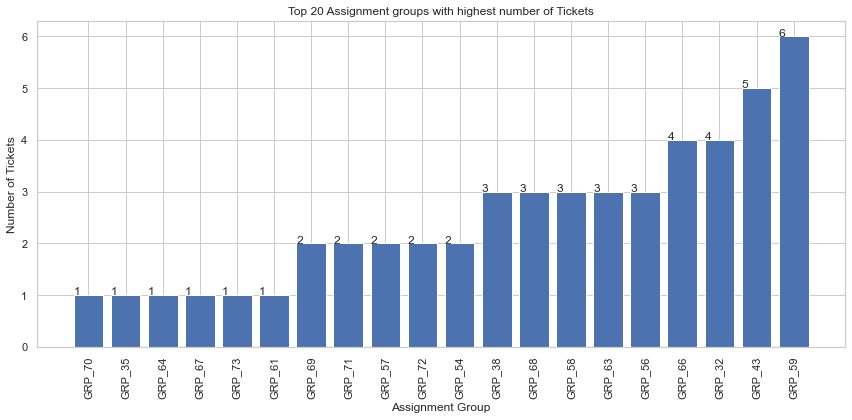

In [58]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Top 20 Assignment groups with smallest number of Tickets')
plt.xlabel("Assignment Group")
plt.xticks(rotation=90)
plt.ylabel("Number of Tickets")

for bar in bars:
    print(bar)
    yval=bar.get_height()
    print(yval)
    plt.text(bar.get_x(), yval + .005 , yval)
    
plt.tight_layout()
plt.show()


In [59]:
# ### Distribution of tickets counts in various bins


In [60]:
# ### Distribution of tickets counts in various bins


In [61]:
pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}


Empty DataFrame
Columns: [Description, Ticket Count]
Index: []

In [69]:
df_inc.head()
len(df_inc[df_inc['Assignment group'] < 2])

6

In [71]:
df_bins=pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}


In [76]:
df_bins=df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket],ignore_index=True)

In [77]:
df_bins.head()

Description Ticket Count
0       1 ticket            6
1     2-5 ticket           13
2    6-10 ticket            6
3   11-20 ticket            9
4   21-50 ticket           16

(-1.1019890551483629,
 1.1224353061977403,
 -1.1079626168723997,
 1.1159579389457492)

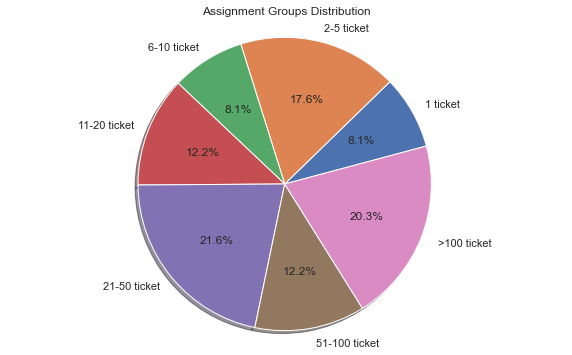

In [83]:
plt.figure(figsize=(10,6))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'], autopct='%1.1f%%', startangle=15, shadow=True)
plt.title('Assignment Groups Distribution')
plt.axis('equal')

In [84]:
# - We see that there are 6 Assignment Group’s for which just have 1 ticket in the dataset
# - There are 15 Assignment group’s which have more than 100 tickets. 
# - Only 20% of the Assignment groups have greater than 100 tickets.

In [85]:
df_incidents.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0  
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                       skype error             GRP_0

In [88]:
df_incidents[df_incidents['Short description'].isnull()]

Short description                                        Description  \
2604               NaN  \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...   
3383               NaN  \r\n-connected to the user system using teamvi...   
3906               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3910               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3915               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3921               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3924               NaN  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...   
4341               NaN  \r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0

In [89]:
df_incidents[df_incidents['Description'].isnull()]


Short description Description Assignment group
4395  i am locked out of skype         NaN            GRP_0

In [90]:

#Replace NaN values in Short Description and Description columns

df_incidents['Short description']=df_incidents['Short description'].replace(np.nan,'',regex=True)
df_incidents['Description']=df_incidents['Description'].replace(np.nan,'',regex=True)


In [91]:
df_incidents.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [93]:
df_incidents['New_Description']=df_incidents['Short description'] + df_incidents['Description'] 


In [94]:
df_incidents.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description  
0  login issue-verified user details.(employee# &...  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  
3  unable to access hr_tool pageunable to access ...  
4                           skype error skype error

In [95]:
df_incidents_level=df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))
# df_incidents_level = df_incidents.copy()
# df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))
df_incidents_level.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description Target  
0  login issue-verified user details.(employee# &...  L1/L2  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  L1/L2  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  L1/L2  
3  unable to access hr_tool pageunable to access ...  L1/L2  
4                           skype error skype error   L1/L2

In [96]:
x= df_incidents_level.Target.value_counts()
print(x)

L1/L2    4637
L3       3863
Name: Target, dtype: int64


Text(0, 0.5, 'sample')

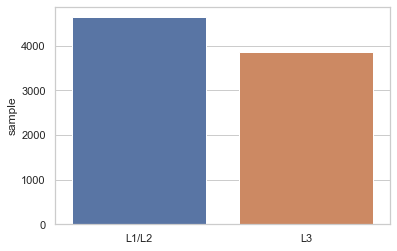

In [97]:
sns.barplot(x.index,x)
plt.gca().set_ylabel('sample')

In [98]:
# ### Characters in Short description by L1/L2 and L3


Text(0.5, 0.98, 'Characters in short description')

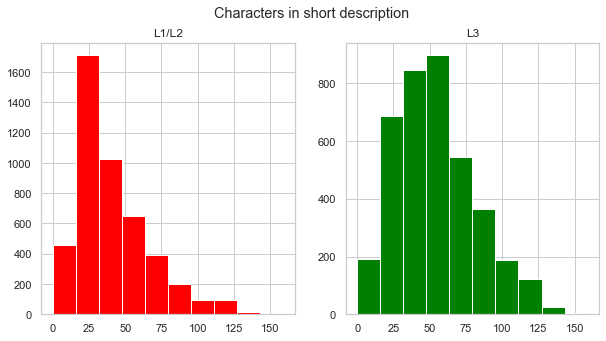

In [106]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len= df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in short description')


In [107]:
# ### Words in Short description by L1/L2 and L3


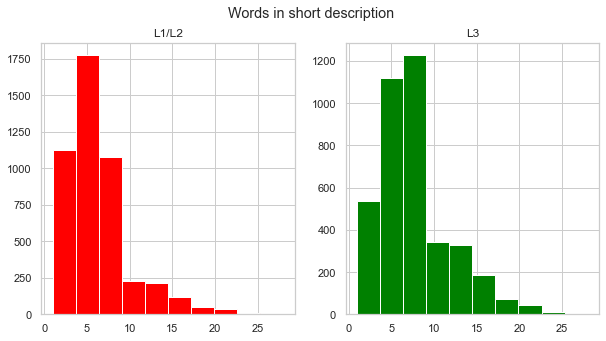

In [108]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in short description')
plt.show()


In [109]:
df_incidents_level['Short description']=df_incidents_level['Short description'].apply(str)

def ave_word_len(sentence):
    words  = sentence.split(" ")
    return ((sum((len(word) for word in words))/len(words)))

df_incidents_level["short_description_avg_word_len"] = df_incidents_level["Short description"].apply(ave_word_len)


In [110]:
df_incidents_level.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description Target  \
0  login issue-verified user details.(employee# &...  L1/L2   
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  L1/L2   
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  L1/L2   
3  unable to access hr_tool pageunable to access ...  L1/L2   
4                           skype error skype error   L1/L2   

   short_description_avg_word_len  
0                        5.000000  
1                        7.000000  
2                        2.800000  
3                        5.000000  
4                        3.333333

In [111]:
# ### Average word length in Short description by L1/L2 and L3


/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


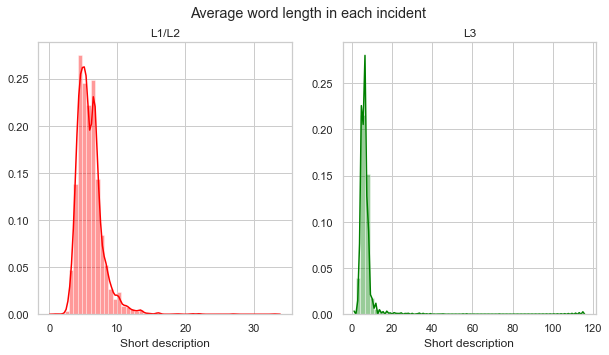

In [112]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('L1/L2')
word=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('L3')
fig.suptitle('Average word length in each incident');


In [113]:
# ### Number of upper case in Short description by L1/L2 and L3


In [114]:

df_incidents_level["short_description_nupper"] = df_incidents_level["Short description"].apply((lambda word: len([x for x in word.split() if x.isupper()])))
df_incidents_level[["Short description","short_description_nupper"]].sort_values(by = "short_description_nupper",ascending = False).head()



Short description  \
4693  hzptilsw wusdajqv : log on balancing error for...   
5964  add im:mfg_planner_reference to the miiadmin e...   
4976  please check the ale in detail, we have ongoin...   
1848            erp SID_34 and erp SID_1 password reset   
4324  reset password user zigioachstyac - SID_34 /SI...   

      short_description_nupper  
4693                         2  
5964                         2  
4976                         2  
1848                         2  
4324                         2

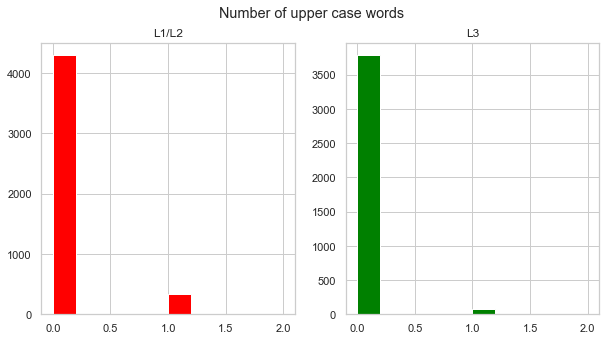

In [115]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_nupper']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_nupper']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Number of upper case words')
plt.show()

In [116]:
# ### Number of digits in Short description by L1/L2 and L3


In [118]:
df_incidents_level["short_description_ndigits"] = df_incidents_level["Short description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_incidents_level[["Short description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()


Short description  \
5469  sto 5019179518 is for 2 pcs of material 631688...   
2867  prdord 226040587   226040835    226040589    2...   
6287  i am stuck.     has 3 lines.   lines 40 and 50...   
145             unable to start dell 7350 2 in 1 device   
3235                no audio in dell 7350 2 in 1 tablet   

      short_description_ndigits  
5469                          4  
2867                          4  
6287                          4  
145                           3  
3235                          3

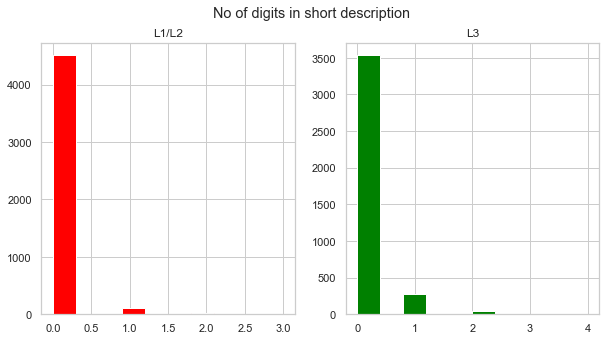

In [119]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_ndigits']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_ndigits']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('No of digits in short description')
plt.show()


In [120]:
# ## Let use word cloud to visualize the type of words used in Description
# 
# One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here our words can simply be taken from the column "text"


In [121]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

In [122]:
from wordcloud import WordCloud, STOPWORDS 


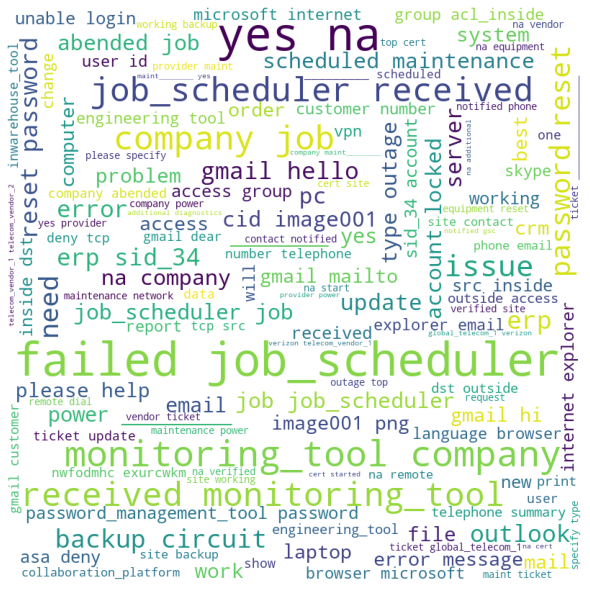

In [123]:
wordcloud = f_word_cloud(df_incidents.New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [124]:

# ## Lets view the word cloud of top 4 assignment groups to see the kind of tickets assigned to them

# ### Word Cloud for tickets with Assignment group 'GRP_0'


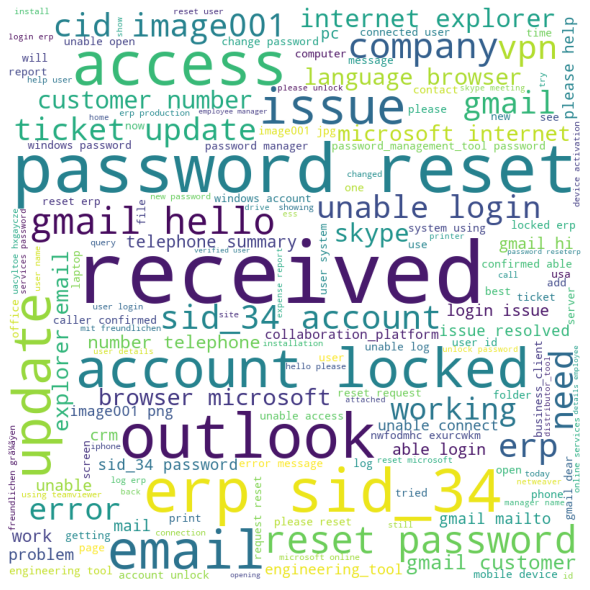

In [125]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [126]:
# GRP_0 seems to have tickets related to password reset, access issues , login issue, connectivity issue etc..

# ### Word Cloud for tickets with Assignment group 'GRP_8'

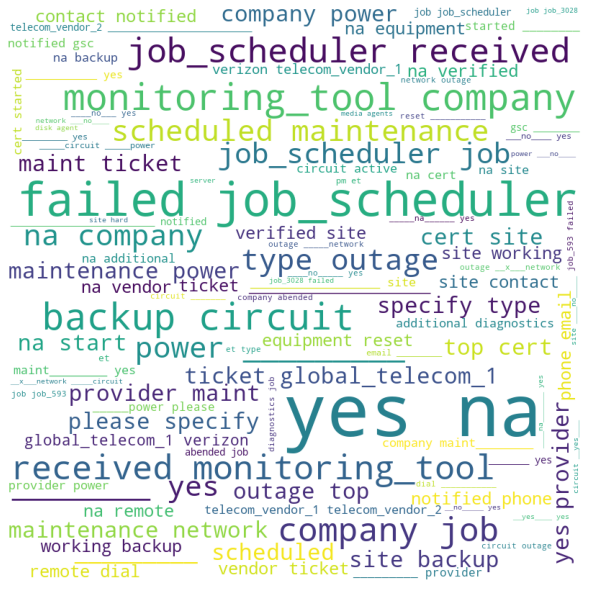

In [127]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [128]:
# GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

# ### Word Cloud for tickets with Assignment group 'GRP_12'

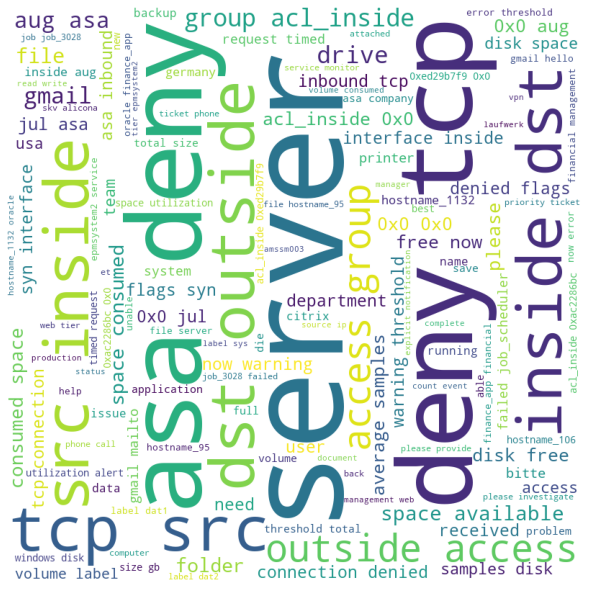

In [129]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [130]:
# GRP_12 contains tickets related to systems like  disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.
# ### Word Cloud for tickets with Assignment group 'GRP_24'


In [131]:
# ### Word Cloud for tickets with Assignment group 'GRP_24'


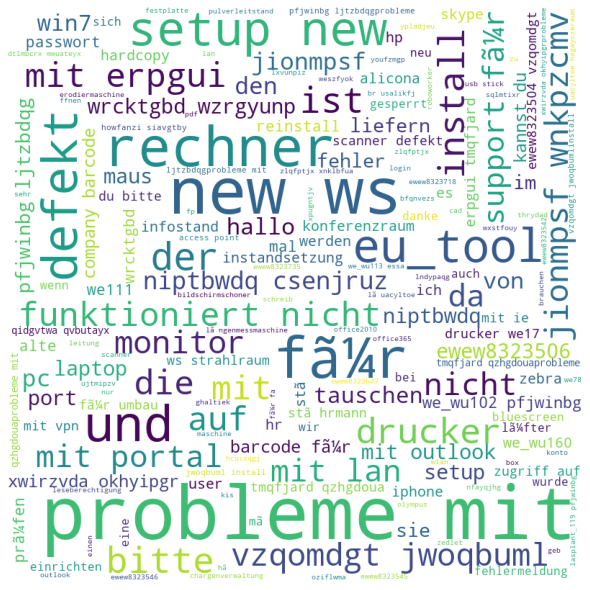

In [132]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [133]:
# GRP_24 - Tickets are mainly in german, these tickets need to be translated to english before passing it to our model.

# ### Seems like there are few tickets with description in some other language, probably in German


In [134]:
df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description


222     support fÃ¼r fa.gstry \arexjftu ohxdwnglsuppor...
223     probleme mit bluescreen .hallo ,\n\nes ist ern...
255     probleme mit laufwerk z: \laeusvjo fvaihgpxpro...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunpalte eq abho...
305     probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...
306     support fÃ¼r we111\zlqfptjx xnklbfuasupport fÃ...
349     install EU_tool \laeusvjo fvaihgpxinstall EU_t...
441     probleme mit portal \knlrgsiv cqvuexjzprobleme...
446     setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...
453     probleme mit erpgui \tmqfjard qzhgdouaprobleme...
454     support fÃ¼r fa.thrydsss-funke \laeusvjo fvaih...
455     bildband  tauschen \drucker we68678 \vepxdgot ...
555     probleme mit fixiereinheit we101 \qvncizuf uei...
586     probleme mit bluescreen hallo ,\n\ngerade eben...
589     probleme mit lan fÃ¼r rechner erodiermaschine\...
744     drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...
748     reinst

In [135]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df_incidents['New_Description'] = df_incidents['New_Description'].apply(fn_decode_to_ascii)


In [136]:
df_incidents.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description  
0  login issue-verified user details.(employee# &...  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  
3  unable to access hr_tool pageunable to access ...  
4                           skype error skype error

In [137]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  


In [138]:
df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)


In [139]:
df_incidents["language"].value_counts()


en    7111
de     393
af     277
it     120
no     111
fr     105
nl      67
sv      51
es      43
ca      41
pl      34
da      29
pt      19
ro      15
sq      13
sl      12
cy      11
tl      10
et       8
fi       7
hr       6
id       5
cs       4
so       3
lv       2
sk       1
vi       1
lt       1
Name: language, dtype: int64

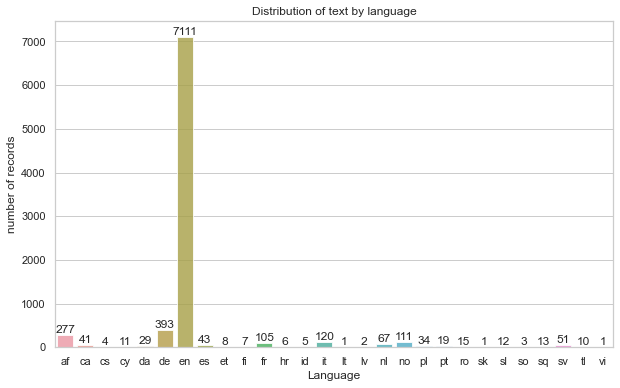

In [140]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();


In [141]:

# - We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english.
# - We will be using google translate package to translate


In [142]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)


{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [143]:
# ### Translate the text to English


In [144]:
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    

In [145]:
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)


In [146]:
df_incidents.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description language  \
0  login issue-verified user details.(employee# &...       en   
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...       en   
2  cant log in to vpn\r\n\r\nreceived from: eylqg...       en   
3  unable to access hr_tool pageunable to access ...       en   
4                           skype error skype error        no   

                                 English_Description  
0  login issue-verified user details.(employee# &...  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  
3  unable to access hr_tool pageunable to access ...  
4                           skype error skype error

In [147]:
# Note: Google Translate API is used for translating the german text, however there is limit imposed from Google on the number of requests from a particular ip address. So the traslation was done in batches and save to a file. Which will be used for further processing

# #### We mainly see that GRP_0 contains incidents related to account lockout, lets see if other groups also have incidents related to account lockout


In [148]:
df_incidents[df_incidents["Short description"].str.contains("account lock")]["Assignment group"].value_counts()


GRP_0     226
GRP_2       3
GRP_72      1
GRP_34      1
Name: Assignment group, dtype: int64

In [149]:
df_incidents[df_incidents["Short description"].str.contains("oneteam")]["Assignment group"].value_counts()


GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

In [150]:
# Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. 


In [151]:
df_incidents.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description language  \
0  login issue-verified user details.(employee# &...       en   
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...       en   
2  cant log in to vpn\r\n\r\nreceived from: eylqg...       en   
3  unable to access hr_tool pageunable to access ...       en   
4                           skype error skype error        no   

                                 English_Description  
0  login issue-verified user details.(employee# &...  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  
3  unable to access hr_tool pageunable to access ...  
4                           skype error skype error

In [152]:
df_incidents.to_csv('../dataset/inc_tranlated.csv',encoding='utf-8', index=False)



In [154]:
df_tranlated_text = pd.read_csv('../dataset/inc_tranlated.csv',encoding='utf-8')


In [155]:
df_tranlated_text.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                     New_Description language  \
0  login issue-verified user details.(employee# &...       en   
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...       en   
2  cant log in to vpn\r\n\r\nreceived from: eylqg...       en   
3  unable to access hr_tool pageunable to access ...       en   
4                           skype error skype error        no   

                                 English_Description  
0  login issue-verified user details.(employee# &...  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  
3  unable to access hr_tool pageunable to access ...  
4                           skype error skype error

In [157]:
df_tranlated_inc = df_tranlated_text.drop(['Short description','language','New_Description'],axis=1)


In [158]:
df_tranlated_inc.English_Description=df_tranlated_inc.English_Description.astype(str)


In [159]:
df_tranlated_inc.head()


Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 English_Description  
0  login issue-verified user details.(employee# &...  
1  outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...  
2  cant log in to vpn\r\n\r\nreceived from: eylqg...  
3  unable to access hr_tool pageunable to access ...  
4                           skype error skype error

In [160]:
df_tranlated_inc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Description          8499 non-null   object
 1   Assignment group     8500 non-null   object
 2   English_Description  8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [161]:

import string
import re
from collections import Counter
from nltk.corpus import stopwords



In [162]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers


In [164]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text


In [165]:
df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))


0       login issueverified user detailsemployee  mana...
1       outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2       cant log in to vpn eylqgodmybqkwiami cannot lo...
3       unable to access hrtool pageunable to access h...
4                                skype error skype error 
5       unable to log in to engineering tool and skype...
6       event critical the value of mountpoint thresho...
7        employment status  new nonemployee  employmen...
8       unable to disable add ins on outlookunable to ...
9                            ticket update on  update on 
10      engineering tool says not connected and unable...
11      hrtool site not loading page correctlyhrtool s...
12      unable to login to hrtool to sgxqsuojr xwbesor...
13      user wants to reset the passworduser wants to ...
14       unable to open payslips unable to open payslips 
15                           ticket update on  update on 
16      unable to login to company vpn xyzi am unable ...
17      when u

In [166]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))


In [167]:
df_tranlated_inc.drop(['English_Description'],axis=1,inplace=True)


In [168]:
df_tranlated_inc.head()

Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 cleaned_description  
0  login issueverified user detailsemployee  mana...  
1  outlook hmjdrvpbkomuaywn teammy meetingsskype ...  
2  cant log in to vpn eylqgodmybqkwiami cannot lo...  
3  unable to access hrtool pageunable to access h...  
4                           skype error skype error

In [169]:
# ### Removal of Stop Words
# Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.


In [170]:
from nltk.corpus import stopwords


In [171]:
stop = stopwords.words('english')

In [173]:
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [176]:
df_tranlated_inc['cleaned_description'].apply( lambda x: " ".join(x for x in str(x).split() if x not in stop))

0       login issueverified user detailsemployee manag...
1       outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2           cant log vpn eylqgodmybqkwiami cannot log vpn
3       unable access hrtool pageunable access hrtool ...
4                                 skype error skype error
5       unable log engineering tool skypeunable log en...
6       event critical value mountpoint threshold orac...
7       employment status new nonemployee employment s...
8       unable disable add ins outlookunable disable a...
9                                    ticket update update
10      engineering tool says connected unable submit ...
11      hrtool site loading page correctlyhrtool site ...
12      unable login hrtool sgxqsuojr xwbesorf cardsun...
13      user wants reset passworduser wants reset pass...
14              unable open payslips unable open payslips
15                                   ticket update update
16      unable login company vpn xyzi unable login com...
17      undock

In [177]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))


In [178]:
df_tranlated_inc['cleaned_description'].head()


0    login issueverified user detailsemployee manag...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool pageunable access hrtool ...
4                              skype error skype error
Name: cleaned_description, dtype: object

In [179]:
# ### Lemmatization


In [180]:
import nltk
#nltk.download('wordnet')

from textblob import Word

In [181]:
df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))


0       login issueverified user detailsemployee manag...
1       outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2           cant log vpn eylqgodmybqkwiami cannot log vpn
3       unable access hrtool pageunable access hrtool ...
4                                 skype error skype error
5       unable log engineering tool skypeunable log en...
6       event critical value mountpoint threshold orac...
7       employment status new nonemployee employment s...
8       unable disable add in outlookunable disable ad...
9                                    ticket update update
10      engineering tool say connected unable submit r...
11      hrtool site loading page correctlyhrtool site ...
12      unable login hrtool sgxqsuojr xwbesorf cardsun...
13       user want reset passworduser want reset password
14                unable open payslip unable open payslip
15                                   ticket update update
16      unable login company vpn xyzi unable login com...
17      undock

In [182]:
df_tranlated_inc['cleaned_description']= df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_tranlated_inc['cleaned_description'].head()

0    login issueverified user detailsemployee manag...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool pageunable access hrtool ...
4                              skype error skype error
Name: cleaned_description, dtype: object

In [183]:
# ### take a look at the average (mean) number of words in each ticket, and the longest and shortest description in our data set


In [184]:
df_tranlated_inc['num_wds'] = df_tranlated_inc['cleaned_description'].apply(lambda x: len(x.split()))
df_tranlated_inc['num_wds'].mean()


16.915176470588236

In [185]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())


620
0


In [186]:
len(df_tranlated_inc[df_tranlated_inc['num_wds']==0])


20

In [187]:
df_tranlated_inc= df_tranlated_inc[df_tranlated_inc['num_wds']>1]


In [188]:
df_tranlated_inc.head()

Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 cleaned_description  num_wds  
0  login issueverified user detailsemployee manag...       18  
1  outlook hmjdrvpbkomuaywn teammy meetingsskype ...       13  
2      cant log vpn eylqgodmybqkwiami cannot log vpn        7  
3  unable access hrtool pageunable access hrtool ...        7  
4                            skype error skype error        4

In [189]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())


620
2


In [190]:
# ### Average Word Length

# In[55]:


def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [191]:
df_tranlated_inc['avg_word'] = df_tranlated_inc['cleaned_description'].apply(lambda x: avg_word(str(x)))
df_tranlated_inc.head()

Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 cleaned_description  num_wds  avg_word  
0  login issueverified user detailsemployee manag...       18  7.555556  
1  outlook hmjdrvpbkomuaywn teammy meetingsskype ...       13  7.538462  
2      cant log vpn eylqgodmybqkwiami cannot log vpn        7  5.571429  
3  unable access hrtool pageunable access hrtool ...        7  6.285714  
4                            skype error skype error        4  5.000000

In [192]:
# ## visualize a distribution of the description word counts to see how skewed our average might be by outliers. Let's generate another plot to take a look:


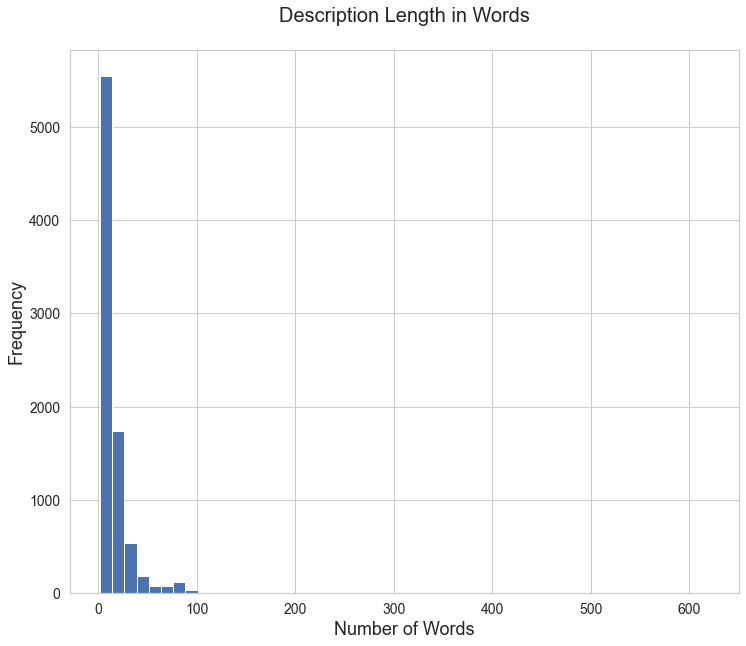

In [193]:
ax=df_tranlated_inc['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);



In [194]:
# ### Number of unique words in each article


In [195]:
df_tranlated_inc['uniq_wds'] = df_tranlated_inc['cleaned_description'].str.split().apply(lambda x: len(set(x)))
df_tranlated_inc['uniq_wds'].head()

0    15
1    12
2     5
3     5
4     2
Name: uniq_wds, dtype: int64

In [196]:
# ### average (mean) number of unique words per incident, and the minimum and maximum unique word counts.


In [197]:

print(df_tranlated_inc['uniq_wds'].mean())
print(df_tranlated_inc['uniq_wds'].min())
print(df_tranlated_inc['uniq_wds'].max())


12.128415300546449
1
370


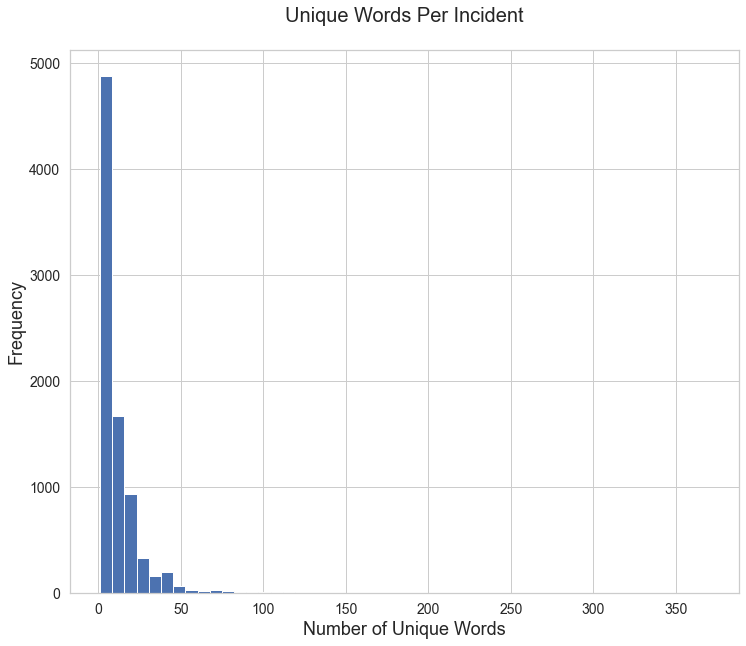

In [198]:

ax=df_tranlated_inc['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [199]:
# When we plot this into a chart, we can see that while the distribution of unique words is still skewed, it looks a bit similar to the distribution based on total word counts we generated earlier.


In [200]:
assign_grps = df_tranlated_inc.groupby('Assignment group')


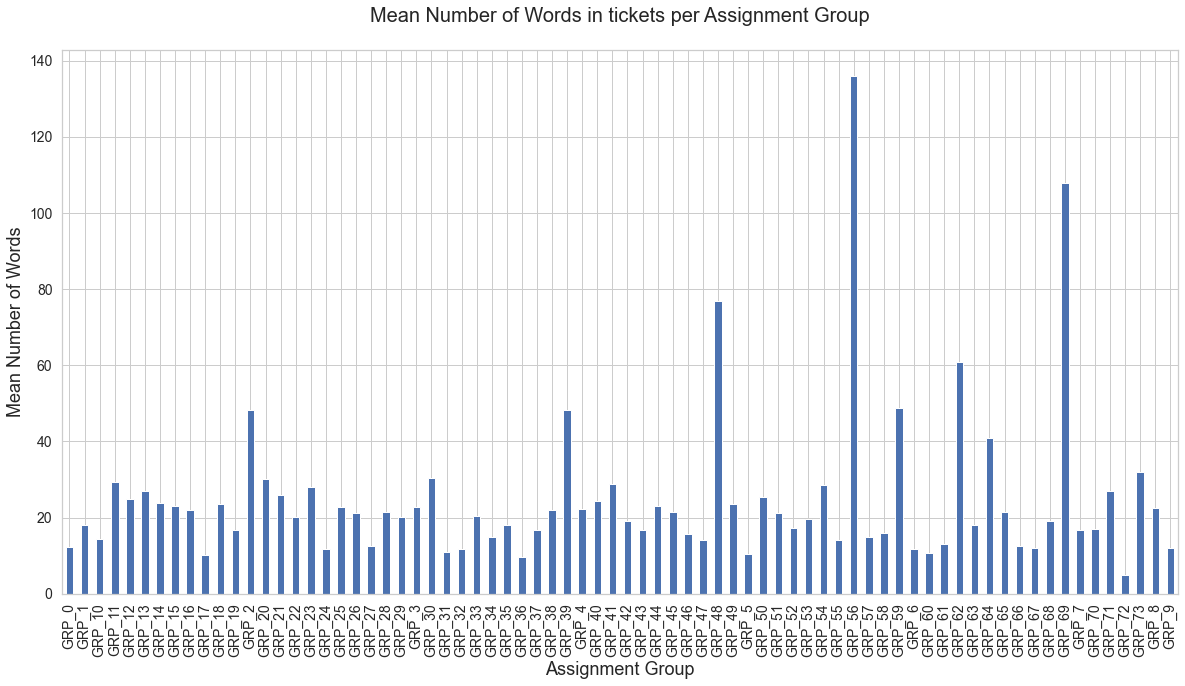

In [201]:
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);


In [202]:
# ### Mean Number of Unique Words in tickets per Assignment Group


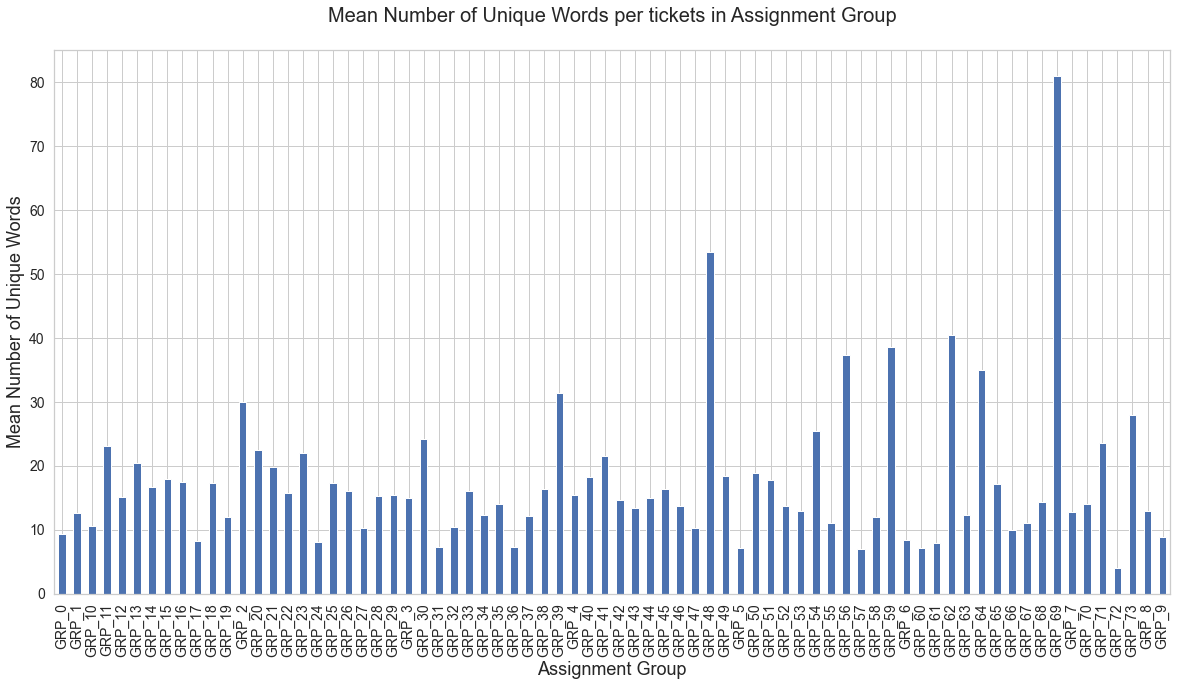

In [203]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);


In [204]:
# Finally, let’s look at the most common words over the entire corpus.


In [205]:
wd_counts = Counter()
for i, row in df_tranlated_inc.iterrows():
    wd_counts.update(row['cleaned_description'].split())
    
wd_counts.most_common(20)

[('jobscheduler', 1915),
 ('password', 1883),
 ('failed', 1702),
 ('erp', 1696),
 ('yesnona', 1568),
 ('user', 1308),
 ('t', 1236),
 ('job', 1207),
 ('reset', 1154),
 ('unable', 1068),
 ('access', 1056),
 ('account', 1041),
 ('issue', 1024),
 ('error', 866),
 ('company', 825),
 ('monitoringtooljob', 785),
 ('site', 783),
 ('need', 782),
 ('login', 742),
 ('working', 715)]

In [206]:
# Above, we can see some pretty predictable words


In [207]:

# ### Tokenization
# Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc.


In [208]:
import nltk


In [228]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_tranlated_inc['token_desc'] = df_tranlated_inc['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))


In [230]:
df_tranlated_inc['token_desc'].head()


0    [login, issueverified, user, detailsemployee, ...
1    [outlook, hmjdrvpbkomuaywn, teammy, meetingssk...
2    [cant, log, vpn, eylqgodmybqkwiami, cannot, lo...
3    [unable, access, hrtool, pageunable, access, h...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

In [231]:

# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [232]:
df_tranlated_inc['token_desc'] = df_tranlated_inc['token_desc'].apply(lambda x : combine_text(x))


In [233]:
df_tranlated_inc.head()

Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 cleaned_description  num_wds  avg_word  \
0  login issueverified user detailsemployee manag...       18  7.555556   
1  outlook hmjdrvpbkomuaywn teammy meetingsskype ...       13  7.538462   
2      cant log vpn eylqgodmybqkwiami cannot log vpn        7  5.571429   
3  unable access hrtool pageunable access hrtool ...        7  6.285714   
4                            skype error skype error        4  5.000000   

   uniq_wds                                         token_desc  
0        15  login issueverified user detailsemployee manag...  
1        12  outlook hmjdrvpbkomuaywn teammy meetingsskype ...  
2         5      cant log vpn eylqgodmybqkwiami cannot log vpn  
3         5  unable access hrtool pageunable access hrtool ...  
4         2                            skype error skype error

In [234]:
df_tranlated_inc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418 entries, 0 to 8417
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          8417 non-null   object 
 1   Assignment group     8418 non-null   object 
 2   cleaned_description  8418 non-null   object 
 3   num_wds              8418 non-null   int64  
 4   avg_word             8418 non-null   float64
 5   uniq_wds             8418 non-null   int64  
 6   token_desc           8418 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 460.5+ KB


In [235]:
df_tranlated_inc.to_csv("../dataset/cleaned_data.csv",encoding='utf-8', index=False)


In [236]:
df_tranlated_inc = pd.read_csv('../dataset/cleaned_data.csv',encoding='utf-8')
df_tranlated_inc.head()

Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 cleaned_description  num_wds  avg_word  \
0  login issueverified user detailsemployee manag...       18  7.555556   
1  outlook hmjdrvpbkomuaywn teammy meetingsskype ...       13  7.538462   
2      cant log vpn eylqgodmybqkwiami cannot log vpn        7  5.571429   
3  unable access hrtool pageunable access hrtool ...        7  6.285714   
4                            skype error skype error        4  5.000000   

   uniq_wds                                         token_desc  
0        15  login issueverified user detailsemployee manag...  
1        12  outlook hmjdrvpbkomuaywn teammy meetingsskype ...  
2         5      cant log vpn eylqgodmybqkwiami cannot log vpn  
3         5  unable access hrtool pageunable access hrtool ...  
4         2                            skype error skype error

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(df_tranlated_inc['token_desc'].head(1))

0    login issueverified user detailsemployee manag...
Name: token_desc, dtype: object


In [238]:
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_tranlated_inc['token_desc'])


In [239]:
len(inc_tfidf.todense())


8418

In [241]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf.get_feature_names()

['abended',
 'abended job',
 'able',
 'access',
 'accessgroup',
 'accessgroup aclinside',
 'account',
 'account locked',
 'aclinside',
 'active',
 'add',
 'additional',
 'additional diagnostics',
 'address',
 'agent',
 'alert',
 'also',
 'application',
 'asa',
 'asa deny',
 'attached',
 'available',
 'back',
 'backup',
 'backup circuit',
 'call',
 'cannot',
 'cant',
 'cert',
 'cert site',
 'cert started',
 'change',
 'check',
 'circuit',
 'circuit active',
 'code',
 'collaborationplatform',
 'company',
 'company maint',
 'company power',
 'computer',
 'connect',
 'connection',
 'contact',
 'contact notified',
 'could',
 'create',
 'crm',
 'customer',
 'data',
 'delivery',
 'deny',
 'der',
 'detail',
 'device',
 'diagnostics',
 'dialin',
 'die',
 'document',
 'drive',
 'dst',
 'dst outside',
 'email',
 'employee',
 'engineering',
 'engineering tool',
 'engineeringtool',
 'equipment',
 'equipment reset',
 'erp',
 'erp account',
 'erp password',
 'error',
 'error message',
 'et',
 'event'

In [242]:
tfidf.idf_

array([5.00129373, 5.01436581, 4.09282573, 3.61337731, 7.64035106,
       7.64035106, 3.61662407, 4.89658278, 7.64035106, 4.78597291,
       5.26756171, 4.96307252, 5.06843304, 5.33776597, 5.73418124,
       5.60742954, 4.87919104, 5.00780841, 7.26565761, 7.64035106,
       4.65834898, 4.87346036, 5.04781375, 4.93230086, 5.06843304,
       4.57866082, 4.42877454, 5.00780841, 5.03430003, 5.06843304,
       5.06843304, 4.5127934 , 4.50485685, 5.01436581, 5.07540171,
       5.43307615, 4.9024479 , 3.84998221, 5.08241928, 5.07540171,
       5.0209665 , 4.66760831, 5.03430003, 4.42147524, 5.06843304,
       5.2099326 , 5.01436581, 4.59582862, 5.00780841, 5.09660391,
       5.25912284, 7.47329698, 5.37480724, 5.26756171, 4.92625855,
       5.06843304, 5.06843304, 5.58389904, 5.54960997, 5.49495155,
       7.64035106, 8.09233619, 4.00756108, 5.47389814, 5.2099326 ,
       5.45327886, 5.47389814, 5.03430003, 5.06843304, 3.11955112,
       5.14040654, 5.33776597, 3.61014106, 5.00780841, 4.66760

In [243]:
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [245]:
tfidf.head()

tfidf
abended      5.001294
abended job  5.014366
able         4.092826
access       3.613377
accessgroup  7.640351

In [246]:
# Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.


In [247]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)


tfidf
job                             3.114618
erp                             3.119551
password                        3.140541
jobscheduler                    3.161982
failed                          3.265166
unable                          3.291834
reset                           3.298910
failed jobscheduler             3.341212
monitoringtooljob               3.371290
jobscheduler monitoringtooljob  3.376392

In [248]:
# Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:


In [249]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)


tfidf
outside accessgroup    8.092336
dst outside            8.092336
tcp src                7.841022
aclinside              7.640351
dst                    7.640351
src                    7.640351
asa deny               7.640351
src inside             7.640351
accessgroup            7.640351
inside dst             7.640351
accessgroup aclinside  7.640351
deny                   7.473297
inside                 7.265658
asa                    7.265658
outside                6.993724
tcp                    6.300577
port                   5.960709
host                   5.833554
incident               5.789751
space                  5.775566

In [250]:
# ### TF-IDF Distribution


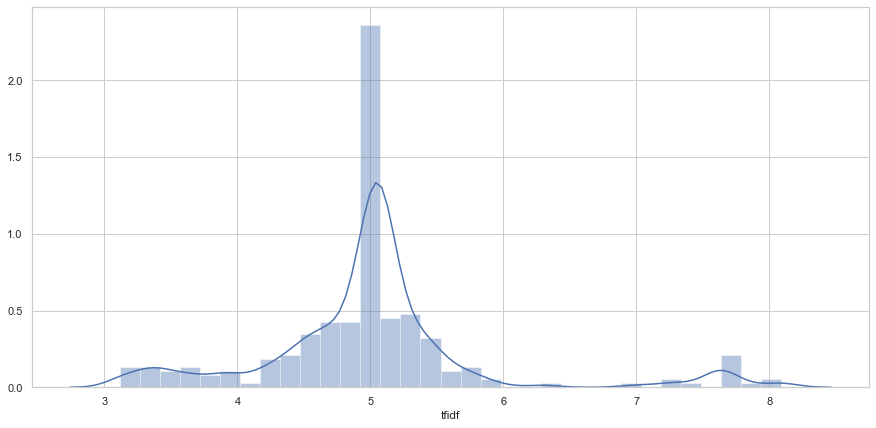

In [251]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf["tfidf"])

In [252]:
# Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.


In [253]:
from sklearn.decomposition import TruncatedSVD
n_comp=10

In [254]:
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(inc_tfidf)


In [257]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8418 samples in 0.004s...
[t-SNE] Computed neighbors for 8418 samples in 0.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8418
[t-SNE] Computed conditional probabilities for sample 2000 / 8418
[t-SNE] Computed conditional probabilities for sample 3000 / 8418
[t-SNE] Computed conditional probabilities for sample 4000 / 8418
[t-SNE] Computed conditional probabilities for sample 5000 / 8418
[t-SNE] Computed conditional probabilities for sample 6000 / 8418
[t-SNE] Computed conditional probabilities for sample 7000 / 8418
[t-SNE] Computed conditional probabilities for sample 8000 / 8418
[t-SNE] Computed conditional probabilities for sample 8418 / 8418
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.204590
[t-SNE] KL divergence after 500 iterations: 0.990338


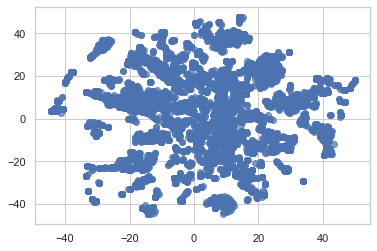

In [258]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

In [259]:
# <b> We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset. </b>

# ### Generate Topics using LDA

In [260]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# create count vectorizer first
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(df_tranlated_inc['token_desc'])

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)


In [261]:
n_top_words = 10
topic_summaries = []

In [266]:
# get topics and topic terms
topic_word = lda_model.components_ 
topic_word
vocab = cvectorizer.get_feature_names()



In [267]:
topic_word

array([[ 0.10000294,  0.10003143,  0.1       , ...,  0.10000029,
         0.10000555, 13.21542867],
       [ 0.10000037,  0.10002619,  0.1       , ...,  0.1       ,
         0.1       ,  0.10001378],
       [ 0.1000003 ,  0.10004438,  0.1       , ...,  0.10000166,
         0.1       ,  0.10000439],
       ...,
       [ 0.10000081, 10.64579874,  0.1       , ...,  0.10000284,
         7.64783104,  0.10002382],
       [ 0.1       ,  0.10000024,  0.1       , ...,  0.1000001 ,
         0.1       ,  0.1       ],
       [ 0.10000163,  0.10005875,  0.10000339, ...,  0.10000327,
         0.10000725,  0.10006179]])

In [268]:
vocab

['ab',
 'abap',
 'abend',
 'abend batch',
 'abended',
 'abended job',
 'aber',
 'abholen',
 'ability',
 'able',
 'able access',
 'able add',
 'able connect',
 'able create',
 'able find',
 'able get',
 'able log',
 'able login',
 'able loginissue',
 'able open',
 'able print',
 'able resolve',
 'able see',
 'able submit',
 'able use',
 'able view',
 'aborted',
 'absender',
 'absender und',
 'ac',
 'accepting',
 'acces',
 'access',
 'access bobj',
 'access collaborationplatform',
 'access company',
 'access crm',
 'access data',
 'access denied',
 'access drawing',
 'access drive',
 'access email',
 'access engineeringtool',
 'access erp',
 'access etcs',
 'access folder',
 'access following',
 'access hrtool',
 'access issue',
 'access issuesystem',
 'access mail',
 'access needed',
 'access network',
 'access point',
 'access request',
 'access right',
 'access server',
 'access site',
 'access system',
 'access user',
 'access vpn',
 'accessgroup',
 'accessgroup aclinside',
 'accessi

In [269]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))


Topic 0: access | email | need | new | unable | skype | login | user | company | change
Topic 1: outlook | unable | crm | open | vpn | connect | log | working | getting | collaborationplatform
Topic 2: user | account | locked | login | erp | connection | account locked | window | able | call
Topic 3: event | mit | nicht | host | und | fr | die | der | ist | bitte
Topic 4: erp | password | reset | printer | production | password reset | problem | request | system | erp password
Topic 5: jobscheduler | failed | failed jobscheduler | job | monitoringtooljob | jobscheduler monitoringtooljob | job failed | monitoringtooljob failed | abended | job jobscheduler
Topic 6: tcp | asa | ticket | space | inside | deny | accessgroup aclinside | src inside | accessgroup | dst
Topic 7: password | id | reset | update | file | ticket | account | passwordmanagementtool | unlock | reset password
Topic 8: yesnona | site | power | circuit | backup | outage | backup circuit | et | company | type
Topic 9: err

In [270]:
topic_summaries

['access email need new unable skype login user company change',
 'outlook unable crm open vpn connect log working getting collaborationplatform',
 'user account locked login erp connection account locked window able call',
 'event mit nicht host und fr die der ist bitte',
 'erp password reset printer production password reset problem request system erp password',
 'jobscheduler failed failed jobscheduler job monitoringtooljob jobscheduler monitoringtooljob job failed monitoringtooljob failed abended job jobscheduler',
 'tcp asa ticket space inside deny accessgroup aclinside src inside accessgroup dst',
 'password id reset update file ticket account passwordmanagementtool unlock reset password',
 'yesnona site power circuit backup outage backup circuit et company type',
 'error issue order cannot message see number screen get customer']

In [271]:
# <b> We can see that password related tickets are classified as topic 3, account related tickets in topic 7 , job scheduler related tickets in topic 8 etc </b>

# ### tf-idf array into pandas dataframe

In [272]:
# collect the tfid matrix in numpy array


In [275]:
array = inc_tfidf.todense()
array[1]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [276]:
# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

0    1         2         3    4    5    6    7    8    9        10   11  \
0  0.0  0.0  0.262844  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3  0.0  0.0  0.000000  0.910037  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
4  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
5  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
6  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
7  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
8  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.899444  0.0   
9  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

    12   13   14   15   16   17   18   19   20   21   22   23   24   25  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         26        27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.307144  0.347301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    54   55   56   57   58   59   60   61   62   63       64        65   66  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.49677  

In [277]:

# #### Adding the output to the dataframe


In [278]:
df_tranlated_inc.head()


Description Assignment group  \
0  -verified user details.(employee# & manager na...            GRP_0   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                       skype error             GRP_0   

                                 cleaned_description  num_wds  avg_word  \
0  login issueverified user detailsemployee manag...       18  7.555556   
1  outlook hmjdrvpbkomuaywn teammy meetingsskype ...       13  7.538462   
2      cant log vpn eylqgodmybqkwiami cannot log vpn        7  5.571429   
3  unable access hrtool pageunable access hrtool ...        7  6.285714   
4                            skype error skype error        4  5.000000   

   uniq_wds                                         token_desc  
0        15  login issueverified user detailsemployee manag...  
1        12  outlook hmjdrvpbkomuaywn teammy meetingsskype ...  
2         5      cant log vpn eylqgodmybqkwiami cannot log vpn  
3         5  unable access hrtool pageunable access hrtool ...  
4         2                            skype error skype error

In [281]:
df_inc['num_wds']= df_tranlated_inc['num_wds']
df_inc['avg_word']= df_tranlated_inc['avg_word']
df_inc['Assignment_group']= df_tranlated_inc['Assignment group']
df_inc.head()


0    1         2         3    4    5    6    7    8    9   10   11   12  \
0  0.0  0.0  0.262844  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.000000  0.910037  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16   17   18   19   20   21   22   23   24   25        26  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.307144   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

         27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.347301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    41   42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    71        72   73   74   75   76   77   78   79   80   81   82   83   84  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.620918  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    85   86   87   88   89   90   91   92   93   94   95   96   97   98   99  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   100  101  102  103  104  105  106  107  108  109       110       111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.509001  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.624293  0.000000  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   

   113  114  115  116  117  118       119  120  121  122  123  124  125  126  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.301575  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [280]:
df_tranlated_inc.columns

Index(['Description', 'Assignment group', 'cleaned_description', 'num_wds',
       'avg_word', 'uniq_wds', 'token_desc'],
      dtype='object')

In [282]:
features = df_inc.columns.tolist()
output = 'Assignment_group'
# removing the output and the id from features
features.remove(output)


In [283]:
df_inc_sample = df_inc[df_inc['Assignment_group'].map(df_inc['Assignment_group'].value_counts()) > 100]


In [284]:
df_inc_sample.head()

0    1         2         3    4    5    6    7    8    9   10   11   12  \
0  0.0  0.0  0.262844  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.000000  0.910037  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16   17   18   19   20   21   22   23   24   25        26  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.307144   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

         27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.347301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    41   42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    71        72   73   74   75   76   77   78   79   80   81   82   83   84  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.620918  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    85   86   87   88   89   90   91   92   93   94   95   96   97   98   99  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   100  101  102  103  104  105  106  107  108  109       110       111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.509001  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.624293  0.000000  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   

   113  114  115  116  117  118       119  120  121  122  123  124  125  126  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.301575  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [285]:
df_inc_sample.shape


(7011, 253)

In [286]:
df_inc_sample['Assignment_group'].value_counts()


GRP_0     3960
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      199
GRP_6      182
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
Name: Assignment_group, dtype: int64

In [292]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota


In [288]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [289]:
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [295]:
df_tranlated_inc[df_tranlated_inc['Assignment group'].map(df_tranlated_inc['Assignment group'].value_counts()) > 100]



Description Assignment group  \
0     -verified user details.(employee# & manager na...            GRP_0   
1     \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0   
2     \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0   
3                         unable to access hr_tool page            GRP_0   
4                                          skype error             GRP_0   
5        unable to log in to engineering tool and skype            GRP_0   
7     ticket_no1550391- employment status - new non-...            GRP_0   
8                  unable to disable add ins on outlook            GRP_0   
9                       ticket update on inplant_874773            GRP_0   
10    engineering tool says not connected and unable...            GRP_0   
11              hr_tool site not loading page correctly            GRP_0   
12    unable to login to hr_tool to sgxqsuojr xwbeso...            GRP_0   
13                     user wants to reset the password            GRP_0   
14                             unable to open payslips             GRP_0   
15                      ticket update on inplant_874743            GRP_0   
16    \n\nreceived from: xyz@company.com\n\nhi,\n\ni...            GRP_0   
17        when undocking pc , screen will not come back            GRP_3   
18                            erp SID_34 account locked            GRP_0   
19                              unable to sign into vpn            GRP_0   
20                             unable to check payslips            GRP_0   
21    \r\n\r\nreceived from: ugephfta.hrbqkvij@gmail...            GRP_0   
22                             unable to connect to vpn            GRP_0   
23                  user called for vendor phone number            GRP_0   
24    \n\nreceived from: dceoufyz.saufqkmd@gmail.com...            GRP_0   
25                           erp SID_37 password reset             GRP_0   
26         unable to login to hr_tool to check payslips            GRP_0   
27                                   account locked out            GRP_0   
28                           unable to login to hr_tool            GRP_0   
29                      unable to log in to erp SID_34             GRP_0   
30            password reset for collaboration_platform            GRP_0   
31    hi\n\nplease reset users password\n\nclient id...            GRP_0   
33                                   ess password reset            GRP_0   
34                       unable to install flash player            GRP_0   
35    ticket_no1564677-employment status - new non-e...            GRP_0   
36         erp SID_34 account unlock and password reset            GRP_0   
37    the status button is dierppearing after a few ...            GRP_0   
38           need to install engineering tool on the pc            GRP_0   
39                           call for ecwtrjnq jpecxuty            GRP_0   
40                       ticket update - inplant_874615            GRP_0   
41                        tablet 7350-sound not working            GRP_0   
42                            unable to login to system            GRP_0   
43    \n\nreceived from: yisohglr.uvteflgb@gmail.com...            GRP_5   
44                     unable to login to hr_tool etime            GRP_0   
45    can not log into hr_tool etime through single ...            GRP_0   
46    password changed in password_management_tool b...            GRP_0   
47    received from: monitoring_tool@company.com\r\n...            GRP_6   
48    windows password change via password_managemen...            GRP_0   
50    received from: monitoring_tool@company.com\r\n...            GRP_8   
51                           call for ecwtrjnq jpecxuty            GRP_0   
52    i need my password_management_tool password ma...            GRP_0   
53    \n\nreceived from: cdbaoqts.wqbsodni@gmail.com...            GRP_0   
54    account kept locking out\r\npossible reasons\r...            GRP_0   
55    \r\n\r\nre

In [294]:
df_tranlated_inc.columns

Index(['Description', 'Assignment group', 'cleaned_description', 'num_wds',
       'avg_word', 'uniq_wds', 'token_desc'],
      dtype='object')

In [296]:
df_inc_sample=df_tranlated_inc[df_tranlated_inc['Assignment group'].map(df_tranlated_inc['Assignment group'].value_counts()) > 100]


In [297]:
x = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']



In [298]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)


In [300]:
# ### Naive Bayes classifier for multinomial models


In [301]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [302]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)


In [303]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [304]:
predictions = nb.predict_proba(X_test)


In [305]:
print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

accuracy 0.6742694226657163
f1 score 0.7856531946970391
logloss: 1.318 


In [306]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


log_entry = pd.DataFrame([["MultinomialNB",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)


              precision    recall  f1-score   support

           0       0.70      1.00      0.82       793
           1       0.00      0.00      0.00        28
           2       0.83      0.19      0.31        52
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        43
           6       0.60      0.06      0.11        48
           7       0.95      0.33      0.49        58
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        36
          13       0.54      0.92      0.68       132
          14       0.00      0.00      0.00        50

    accuracy                           0.67      1403
   macro avg       0.24      0.17      0.16      1403
weighted avg       0.53   

/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [307]:
# ### Linear Support Vector Machine


In [309]:
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42))),
               ])
svc.fit(X_train, y_train)


/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(loss='hinge',
                                                         random_state=42)))])

In [310]:
y_pred = svc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print (focal_loss(alpha=.25, gamma=2))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LinearSVC",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7377049180327869
f1 score 0.7468619938824498
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       793
           1       0.80      0.29      0.42        28
           2       0.68      0.54      0.60        52
           3       0.70      0.55      0.62        29
           4       0.73      0.33      0.46        24
           5       0.62      0.23      0.34        43
           6       0.79      0.46      0.58        48
           7       0.85      0.91      0.88        58
           8       0.67      0.43      0.53        23
           9       0.65      0.33      0.43        40
          10       0.71      0.24      0.36        21
          11       0.13      0.81      0.22        26
          12       0.71      0.28      0.40        36
          13       0.85      0.40      0.55       132
          14       0.67      0.16      0.26        50

    accuracy                           0.74      1403
   macro avg       0.69 

In [311]:
# ### SGD Classifier


In [312]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [313]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


accuracy 0.7213114754098361
f1 score 0.7916095772592655


In [314]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SGDClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       793
           1       0.00      0.00      0.00        28
           2       0.76      0.25      0.38        52
           3       1.00      0.21      0.34        29
           4       0.75      0.12      0.21        24
           5       0.75      0.07      0.13        43
           6       0.81      0.27      0.41        48
           7       0.87      0.79      0.83        58
           8       1.00      0.13      0.23        23
           9       0.50      0.03      0.05        40
          10       1.00      0.05      0.09        21
          11       0.17      0.19      0.18        26
          12       0.91      0.28      0.43        36
          13       0.58      0.85      0.69       132
          14       1.00      0.08      0.15        50

    accuracy                           0.72      1403
   macro avg       0.72      0.29      0.33      1403
weighted avg       0.73   

/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [315]:
# ### Logistic regression


In [316]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [317]:

y_pred = logreg.predict(X_test)
predictions = logreg.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LogisticRegression",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7683535281539559
f1 score 0.7930637249506638
logloss: 1.078 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       793
           1       0.73      0.29      0.41        28
           2       0.73      0.62      0.67        52
           3       0.64      0.55      0.59        29
           4       0.64      0.38      0.47        24
           5       0.46      0.40      0.42        43
           6       0.70      0.58      0.64        48
           7       0.93      0.90      0.91        58
           8       0.60      0.39      0.47        23
           9       0.57      0.33      0.41        40
          10       0.50      0.33      0.40        21
          11       0.33      0.08      0.12        26
          12       0.75      0.25      0.38        36
          13       0.56      0.93      0.70       132
          14       0.62      0.16      0.25        50

    accuracy                           0.77      1403
   macro

In [318]:
# ### Xgboost


In [325]:


import xgboost as xgb

xgboost = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)),
               ])
xgboost.fit(X_train, y_train)





/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:13:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=10, nthread=10, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, ver

In [326]:
y_pred = xgboost.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["Xgboost",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7569493941553813
f1 score 0.7972302649359948
              precision    recall  f1-score   support

           0       0.82      0.97      0.88       793
           1       1.00      0.14      0.25        28
           2       0.72      0.56      0.63        52
           3       0.70      0.48      0.57        29
           4       0.67      0.25      0.36        24
           5       0.52      0.26      0.34        43
           6       0.81      0.46      0.59        48
           7       0.87      0.79      0.83        58
           8       0.73      0.35      0.47        23
           9       0.55      0.15      0.24        40
          10       0.64      0.33      0.44        21
          11       0.00      0.00      0.00        26
          12       0.83      0.28      0.42        36
          13       0.54      0.94      0.69       132
          14       0.57      0.16      0.25        50

    accuracy                           0.76      1403
   macro avg       0.66 

In [327]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

accuracy  f1_score
Classifier                            
LinearSVC           0.737705  0.746862
MultinomialNB       0.674269  0.785653
SGDClassifier       0.721311  0.791610
LogisticRegression  0.768354  0.793064
Xgboost             0.756949  0.797230

In [328]:
# # Conclusions
# 
# - We first analysed the dataset provided to us, undestood the structure of the data provided - number of columns, field , datatypes etc.
# - We did Exploratory Data Analysis to derive further insights from this data set and we found that
#     - Data is very much imbalanced, there are around ~45% of the Groups with less than 20 tickets.
#     - Few of the tickets are in foreign language like German
#     - The data has lot of noise in it, for eg- few tickets related to account setup are spread across multiple assignment groups.
#     
# - We performed the data cleaning and preprocessing
#     - Translation: A small number of tickets were written in German. Hence, we used the Google translate python api  to convert German to English to generate the input data for the next steps. However, the google translator rest api can only process a limited number of texts on a daily basis, so we translated the text in batches and saved the file for further processing.
#     - Make text all lowercase so that the algorithm does not treat the same words in different cases as different
#     - Removing Noise i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values
#     - Removing extract spaces
#     - Removed punctuations
#     - Removed words containing numbers
#     - Stopword Removal: Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words
#     - Lemmatization
#     - Tokenization: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
#     
# 
# - We then ran a basic benchmarck model using the cleaned and preprocessed dataset
#     - Since the dataset is very imbalanced, We considered a subset of groups for predictions.  In 74 groups, 46% of tickets belong to group 1 and 16 groups just have more than 100 tickets, rest of the Assignment groups have very less ticket counts which might not add much value to the model prediction. If we conducted random sampling towards all the subcategories, then we would face a problem that we might miss all the tickets in some categories. Hence, we considered the groups that have more than 100 tickets. 
#     - We trained the data using below models:
#         - Multinomial NB
#         - Linear Support vector Machine
#         - Logistic regression
#         - Xgboost
#         
# - LogisticRegression gives better performance with 
#     - accuracy 0.0.768354
#     - f1 score 0.793064
# 
# <b> Although, it seems like the call is biased towards GRP_0 which has a majority of samples. </b>
# 
# ## Next Steps
# - We could further improve the model by 
# - Exploring more features out of the dataset
# - hyperparameter tuning using GridsearchCV,
# - try transfer learning with word embeddings and use that as a feature for modelling.
# - use neural network architecture like RNN or LSTM to improve model performance.
# 